<h1 style='text-align:center'>Titanic Survival Prediction</h1>

<div class='alert alert-block alert-info' style="color:black">
<b><i>This Project explores the tragic sinking of the RMS Titanic in 1912 through the lens of machine learning. We'll delve into the passenger data, uncovering patterns and relationships between various factors like passenger class, gender, age, and travel arrangements, and their potential influence on survival rates. By building a Support Vector Machine (SVC) model, we aim to predict survival outcomes based on these features, gaining insights into the factors that may have played a role in this historical disaster.
</div>    

![](https://upload.wikimedia.org/wikipedia/commons/7/76/Titanic_Portside_Diagram.jpg)

For Kaggle Dataset : [Click here](https://www.kaggle.com/datasets/brendan45774/test-file)

## Importing Libraries
We will import the essential libraries for this task here. Additional libraries may be imported as needed throughout the notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("Titanic Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Performing Exploratory Data Analysis

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
df.Survived.value_counts()/len(df)*100

Survived
0    63.636364
1    36.363636
Name: count, dtype: float64

In [10]:
df1=df[["PassengerId","Survived","Pclass","Age","SibSp","Parch","Fare"]]

In [11]:
df1_encoded = pd.get_dummies(df[["Sex","Embarked"]])
df1 = pd.concat([df1, df1_encoded], axis=1)

In [12]:
df1.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,0,3,34.5,0,0,7.8292,False,True,False,True,False
1,893,1,3,47.0,1,0,7.0000,True,False,False,False,True
2,894,0,2,62.0,0,0,9.6875,False,True,False,True,False
3,895,0,3,27.0,0,0,8.6625,False,True,False,False,True
4,896,1,3,22.0,1,1,12.2875,True,False,False,False,True


In [13]:
df1.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211,-0.023245,0.023245,-0.027419,-0.035731,0.048008
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514,1.000000,-1.000000,0.033684,0.115574,-0.105883
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147,-0.108615,0.108615,-0.318543,0.252608,0.120783
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932,-0.000013,0.000013,0.180601,-0.017956,-0.158295
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539,0.099943,-0.099943,-0.016365,-0.098824,0.079367
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046,0.159120,-0.159120,-0.005791,-0.132948,0.092201
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000,0.191514,-0.191514,0.312161,-0.155562,-0.178582
Sex_female,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514,1.000000,-1.000000,0.033684,0.115574,-0.105883
Sex_male,0.023245,-1.000000,0.108615,0.000013,-0.099943,-0.159120,-0.191514,-1.000000,1.000000,-0.033684,-0.115574,0.105883
Embarked_C,-0.027419,0.033684,-0.318543,0.180601,-0.016365,-0.005791,0.312161,0.033684,-0.033684,1.000000,-0.199786,-0.767375


## Performing Data Visualization

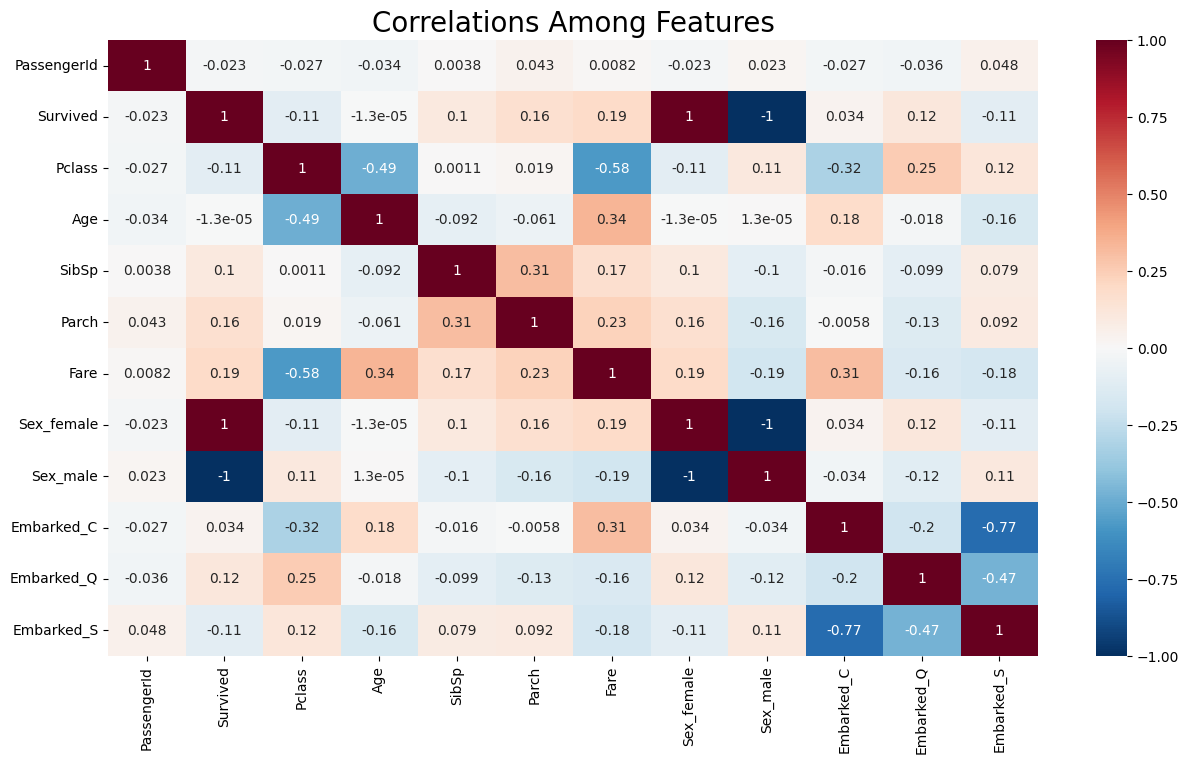

In [14]:
plt.subplots(figsize = (15,8))
sns.heatmap(df1.corr(), annot=True,cmap="RdBu_r")
plt.title("Correlations Among Features", fontsize = 20);

> There is a positive correlation between Fare and Survived rated. This can be explained by saying that, the passenger who paid more money for their ticket were more likely to survive.

>There is a negative correlation between Fare and Pclass. This relationship can be explained by saying that first class passenger(1) paid more for fare then second class passenger(2), similarly second class passenger paid more than the third class passenger(3).

In [15]:
df[ (df['Sex']=='male') & (df['Survived']==1) ].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Shows that Male passesngers have not survived!
Let's visualize it by bar chart

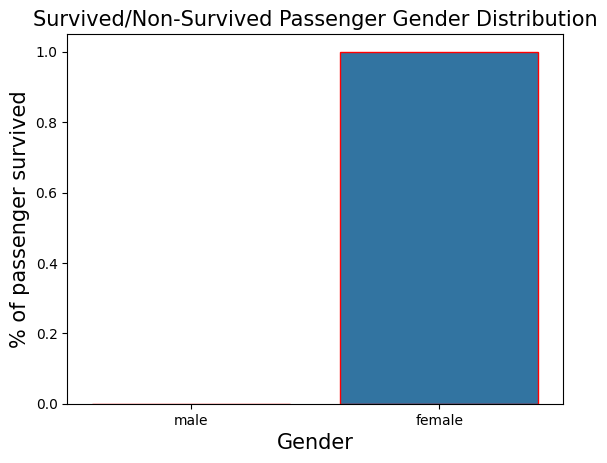

In [16]:
sns.barplot(x="Sex",y="Survived",data=df,edgecolor='Red')
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 15)
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Gender",fontsize = 15)
plt.show()

In [17]:
df.Survived.value_counts()/len(df)*100

Survived
0    63.636364
1    36.363636
Name: count, dtype: float64

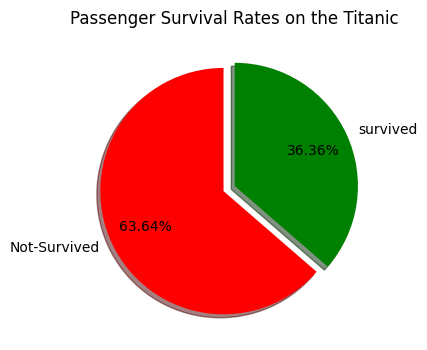

In [18]:
plt.subplots(figsize=(4,4))
(df.Survived.value_counts()/len(df)*100).plot(kind='pie',labels=['Not-Survived','survived'],autopct='%1.2f%%',startangle=90,shadow=True,explode=[0.1,0],pctdistance=0.7,colors=['red','green'])
plt.ylabel('')
plt.title("Passenger Survival Rates on the Titanic")
plt.show()

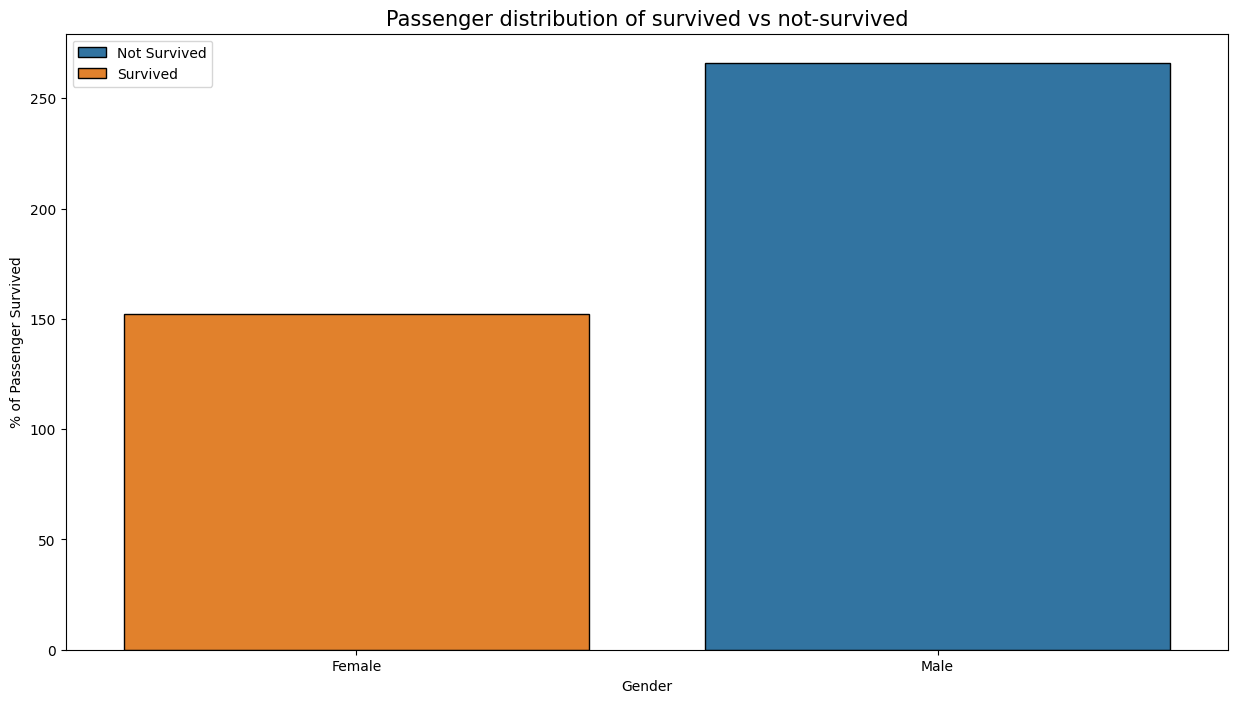

In [19]:
plt.subplots(figsize = (15,8))
ax=sns.countplot(x='Sex_male',data=df1,hue='Survived',edgecolor='Black')
plt.title('Passenger distribution of survived vs not-survived',fontsize=15)
plt.xlabel('Gender',fontsize=10)
plt.ylabel("% of Passenger Survived", fontsize = 10)
labels = ['Female', 'Male']
plt.xticks(df1.Survived.unique(),labels)
plt.legend(["Not Survived","Survived"])
plt.show()

As we suspected, female passengers have survived at a much better rate than male passengers

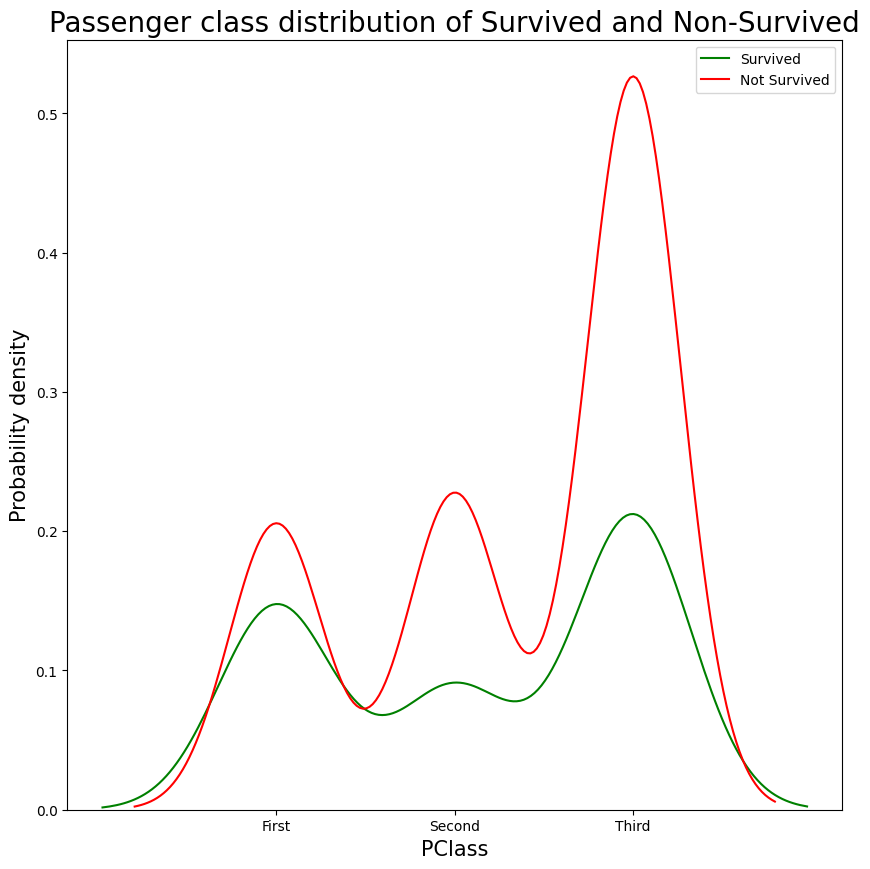

In [20]:
plt.subplots(figsize=(10,10))
colors=["Red","Green"]
sns.kdeplot(x="Pclass",hue="Survived",data=df,palette=colors)
plt.ylabel("Probability density",fontsize=15)
plt.xlabel("PClass",fontsize=15)
plt.legend(["Survived","Not Survived"])
plt.title("Passenger class distribution of Survived and Non-Survived",fontsize=20)
labels = ['First', 'Second', 'Third']
plt.xticks(sorted(df.Pclass.unique()),labels)
plt.show()

> The survival of the people belong to 3rd class is least. And the survival of the people belong to 1st class is most.

> This kde plot is explanatory with all the labels and colors. Sometimes some readers might find questionable is that in, the plot; the third class passengers have survived more than second class passnegers. It is true since there were a lot more third class passengers than first and second which may be due to financial conditions.

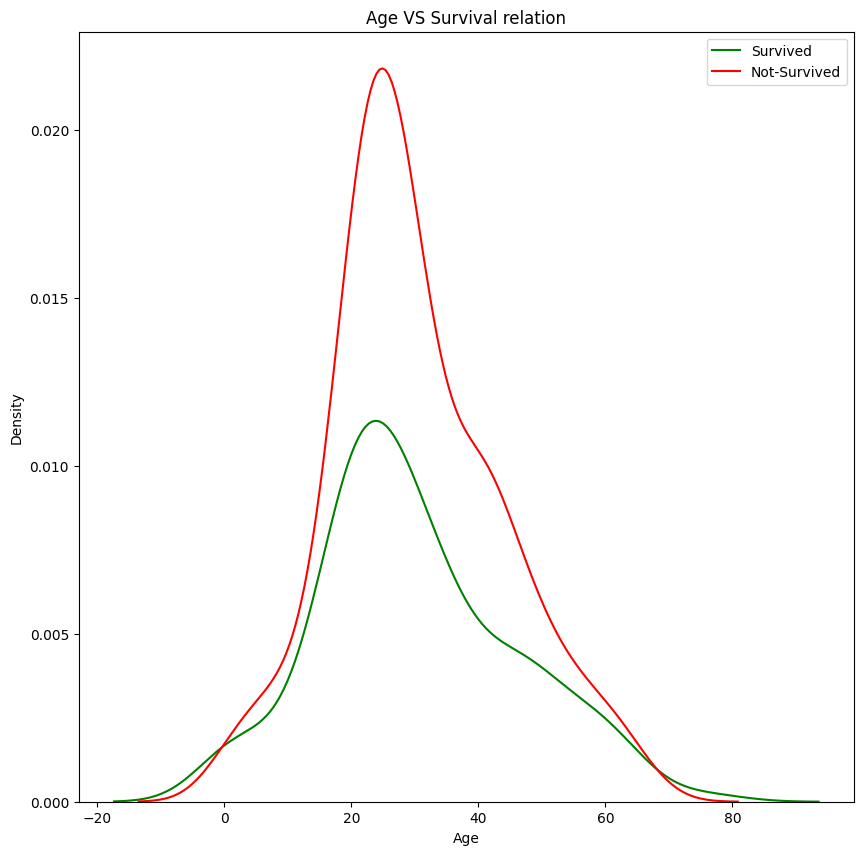

In [21]:
plt.subplots(figsize=(10,10))
sns.kdeplot(x="Age",hue='Survived',data=df,palette=colors)
plt.title('Age VS Survival relation')
plt.legend(["Survived","Not-Survived"])
plt.show()

> The left part and right of the kdeplot shows that children, infants and senior citizens were the priority.

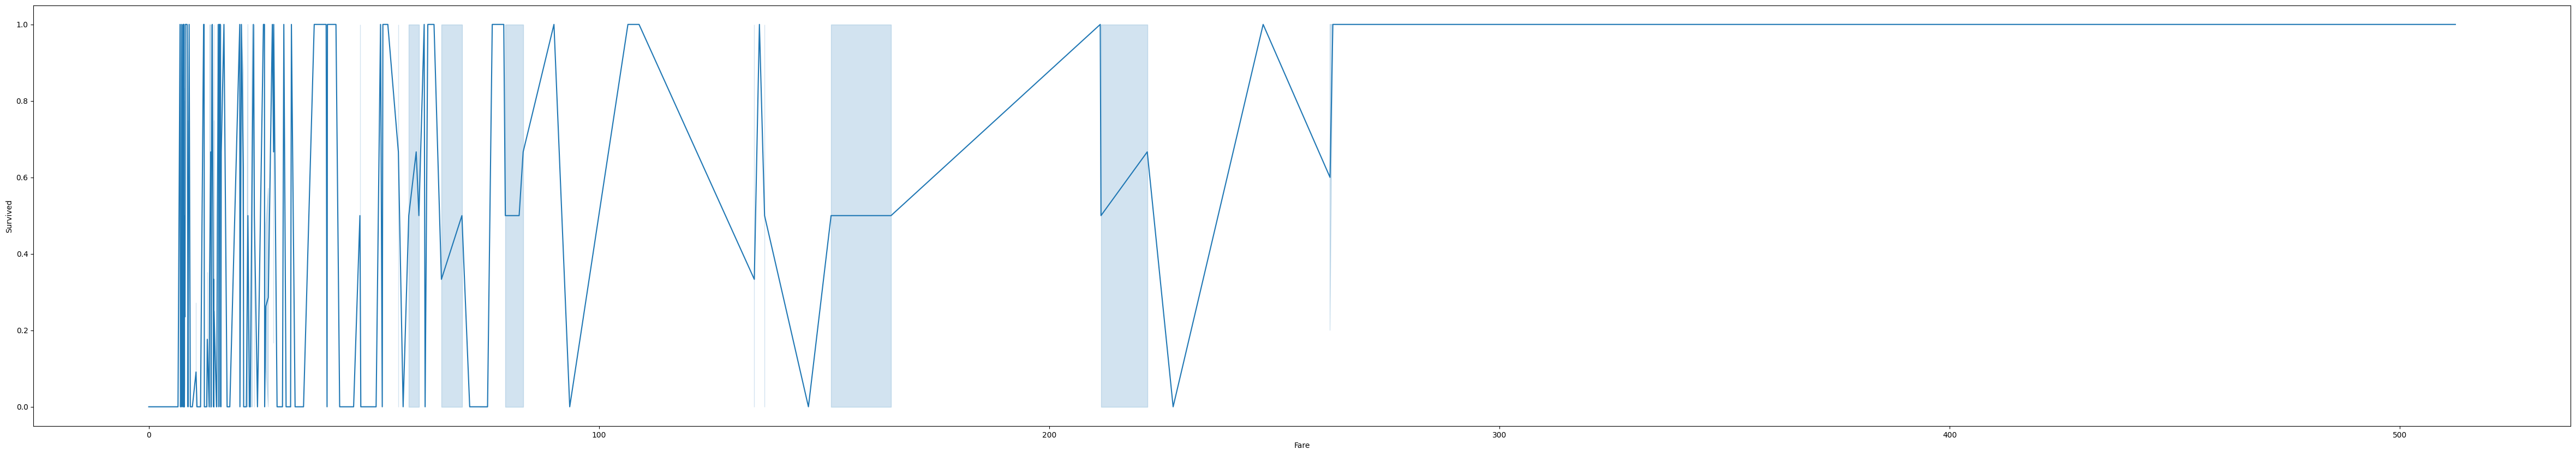

In [22]:
plt.subplots(figsize=(60,10))
sns.lineplot(x="Fare",y="Survived",data=df)
plt.show()

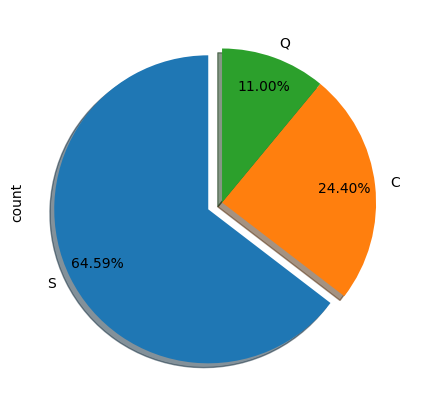

In [23]:
plt.subplots(figsize=(5,5))
labels=['S','C','Q']
df[["Embarked"]].value_counts().plot(kind='pie',autopct='%1.2f%%',startangle=90,shadow=True,explode=[0.1,0,0],pctdistance=0.80,labels=labels)
plt.show()

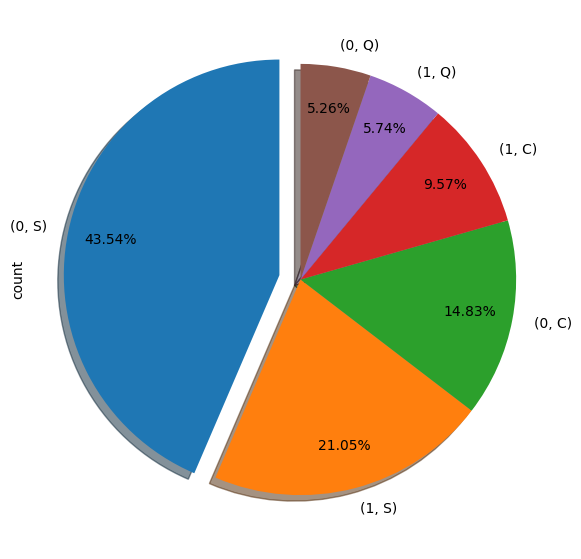

In [24]:
plt.subplots(figsize=(7,7))
df[["Survived","Embarked"]].value_counts().plot(kind='pie',startangle=90,shadow=True,autopct='%1.2f%%',pctdistance=0.80,explode=[0.1,0,0,0,0,0])
plt.show()

## Predictive Modelling

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression

In [26]:
df2=df1.replace({True:1,False:0})
df2=df2.drop('SibSp',axis=1)
df2.head()

,PassengerId,Survived,Pclass,Age,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,0,3,34.5,0,7.8292,0,1,0,1,0
1,893,1,3,47.0,0,7.0000,1,0,0,0,1
2,894,0,2,62.0,0,9.6875,0,1,0,1,0
3,895,0,3,27.0,0,8.6625,0,1,0,0,1
4,896,1,3,22.0,1,12.2875,1,0,0,0,1


In [27]:
mean_fare=df['Fare'].mean()
df2['Fare']=df2['Fare'].replace(np.nan,mean_fare)

In [28]:
df2.head()

,PassengerId,Survived,Pclass,Age,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,0,3,34.5,0,7.8292,0,1,0,1,0
1,893,1,3,47.0,0,7.0000,1,0,0,0,1
2,894,0,2,62.0,0,9.6875,0,1,0,1,0
3,895,0,3,27.0,0,8.6625,0,1,0,0,1
4,896,1,3,22.0,1,12.2875,1,0,0,0,1


In [29]:
X=df2[['Pclass','Parch','Fare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']]
Y=df2['Survived']

### Splitting the dataset into training and testing 

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

> #### We found that SVM, Logistic Regression, Decision Trees are the best for this prediction. So I choose to go with Support Vector Machine.

In [32]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(334, 8)
(334,)
(84, 8)
(84,)


In [33]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_train)

In [34]:
print(X_scaled.shape)

(334, 8)


In [35]:
svc_model = SVC()
param_grid = {'C': [0.01, 0.1, 1, 10],'kernel': ['linear', 'rbf','poly','sigmoid'],'gamma': [0.01,0.1, 1, 10]}

grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=10)

grid_search.fit(X_scaled, Y_train)

print("The Best parameters is = ", grid_search.best_params_)
print("The Best cross-validation score is = ", grid_search.best_score_)

# Getting the best model from the grid search
best_svm_model = grid_search.best_estimator_

# Makings predictions on the original data
predictions = best_svm_model.predict(X_test)




The Best parameters is =  {'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}
The Best cross-validation score is =  1.0


C:\Users\adnan\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


> Best cross-validation score of 1.0 made me suspicious if my model is overfitted. So I checked for more metrics(as shown below).

In [36]:
predictions.shape

(84,)

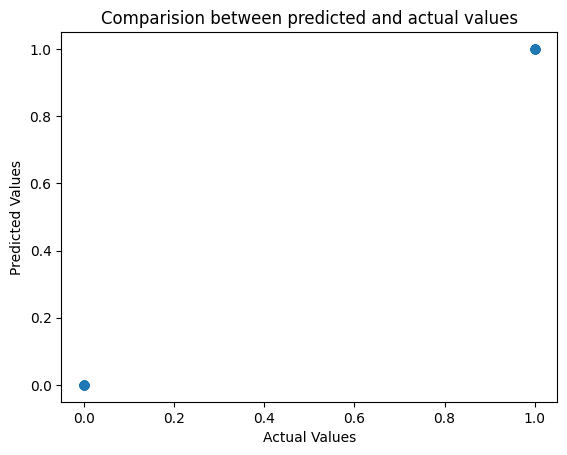

In [37]:
plt.scatter(Y_test,predictions)
plt.title("Comparision between predicted and actual values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [38]:
from sklearn.metrics import f1_score
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy score = ", accuracy)
print("F1 score = ",f1_score(Y_test, predictions))

Accuracy score =  1.0
F1 score =  1.0


> The above metrics proove that the model is not overfitted. Rather the dataset may be highly separable, potentially leading to a model that generalizes well.
> ### Let's use the learning_curve to confirm it

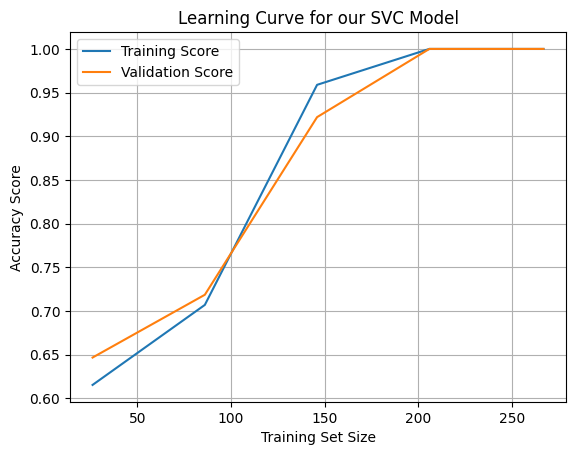

In [39]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(estimator=best_svm_model, X=X_train, y=Y_train, cv=5, scoring='accuracy')
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, validation_scores.mean(axis=1), label='Validation Score')
plt.ylabel('Accuracy Score')
plt.xlabel('Training Set Size')
plt.title('Learning Curve for our SVC Model')
plt.legend()
plt.grid(True)
plt.show()

> ### The above Learning_Curve shows that the model is not overfitted but is performing extremely well!

## Author

### [Mohd Adnan Khan](https://www.linkedin.com/in/mohd-adnan--khan)